In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from functions import calculate_mean

In [3]:
data = pd.read_csv('../iris/iris.data', delimiter=',', names=['sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm','petal_width_in_cm','class'])
X = data.iloc[:,0:4].values
Y = data.iloc[:,4].values

In [4]:
num_folds = 5
skfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

In [5]:
# Encode classes as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# One hot encode integer labels
one_hot_Y = np_utils.to_categorical(encoded_Y)

In [6]:
def get_model():
    # Create model
    model = Sequential()
    model.add(Dense(64,input_shape=(4,),activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(3,activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

    return model

1th - Fold :
train accuracy: 0.97
validation accuracy: 1.00
validation precision: 1.00
validation recall: 1.00


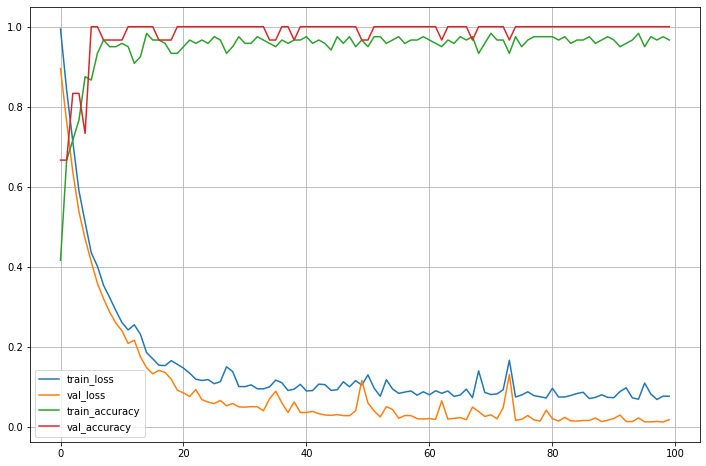

****************************************************************************************************
2th - Fold :
train accuracy: 0.97
validation accuracy: 0.93
validation precision: 0.93
validation recall: 0.93


<Figure size 432x288 with 0 Axes>

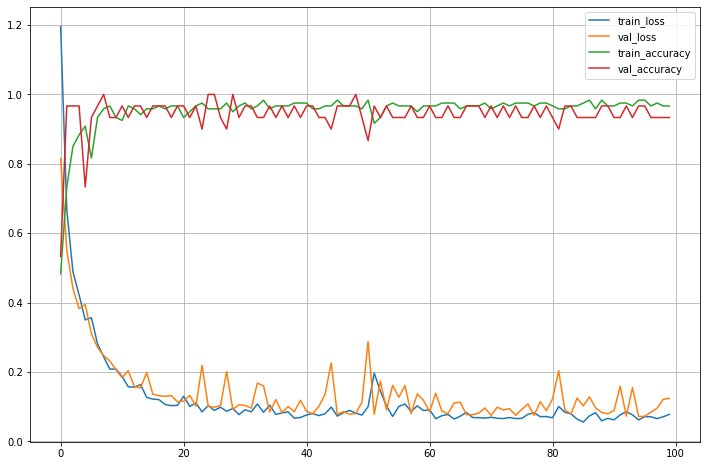

****************************************************************************************************
3th - Fold :
train accuracy: 0.98
validation accuracy: 0.97
validation precision: 0.97
validation recall: 0.97


<Figure size 432x288 with 0 Axes>

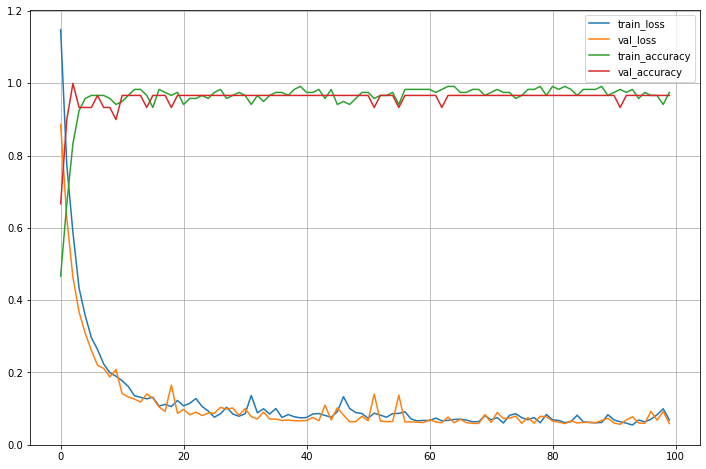

****************************************************************************************************
4th - Fold :
train accuracy: 0.98
validation accuracy: 0.97
validation precision: 0.97
validation recall: 0.97


<Figure size 432x288 with 0 Axes>

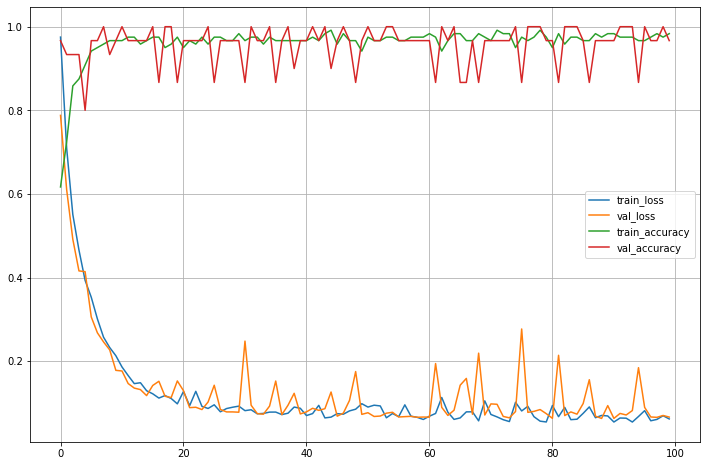

****************************************************************************************************
5th - Fold :
train accuracy: 0.98
validation accuracy: 0.97
validation precision: 0.97
validation recall: 0.97


<Figure size 432x288 with 0 Axes>

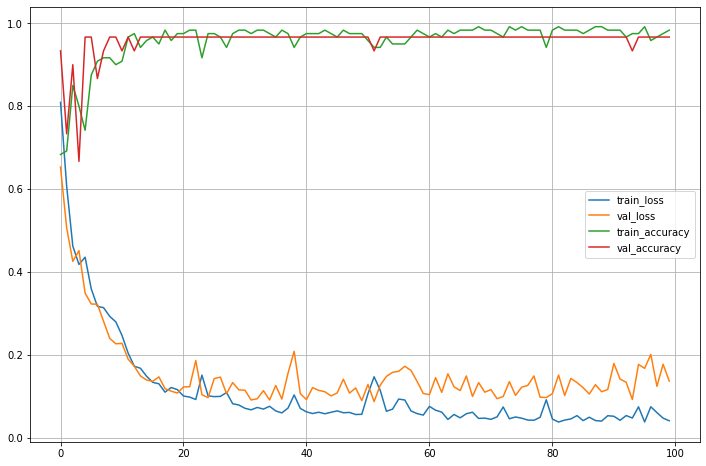

****************************************************************************************************
average validation precision: 0.97
average validation recall: 0.97


<Figure size 432x288 with 0 Axes>

In [7]:
num_epochs = 100
batch_size = 5
fold_index = 1

validation_precisions = [] 
validation_recalls = [] 
# Train model for each fold
for train, test in skfold.split(X, Y):
    # Create model
    model = get_model()
    # Fit the model
    history = model.fit(X[train], one_hot_Y[train], validation_data=(X[test], one_hot_Y[test]), batch_size=batch_size, epochs=num_epochs,verbose=0)
    print("%dth - Fold :" % fold_index)

    # 마지막 epoch의 precision/ recall 값
    validation_precisions.append(history.history['val_precision'][-1])
    validation_recalls.append(history.history['val_recall'][-1])
    print("train accuracy: %.2f" % (history.history['accuracy'][-1]))
    print("validation accuracy: %.2f" % (history.history['val_accuracy'][-1]))
    print('validation precision: %.2f'% (history.history['val_precision'][-1]))
    print("validation recall: %.2f" % (history.history['val_recall'][-1]))
    
    plt.figure(figsize=(12,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train_loss','val_loss', 'train_accuracy','val_accuracy'])
    plt.grid()
    plt.show()
    plt.clf()
    print("*"*100)

    fold_index += 1
print('average validation precision: %.2f'%(calculate_mean(validation_precisions)))
print('average validation recall: %.2f'%(calculate_mean(validation_recalls)))      